In [4]:
import torch
import matplotlib.pyplot as plt

vA1: tensor([6., 2.]) 	L2: tensor(6.3246)
vA2: tensor([8., 8.]) 	L2: tensor(11.3137)
vX: tensor([5., 3.]) 	L2: tensor(5.8310)
vA1A2: tensor([2., 6.]) 	L2: tensor(6.3246)
vA1X: tensor([-1.,  1.]) 	L2: tensor(1.4142)
Косинус угла между X и A1X: tensor(-0.2425)
Косинус угла между A1X и A2: tensor(-0.2425)
Косинус угла между A1 и A1X: tensor(-0.4472)
---
Косинус угла между A1X и A1A2: tensor(0.4472)
Косинус угла между A1X и A1A0(-A1): tensor(0.4472)
Проекция A1X на A1A2: tensor(0.6325)
Проекция A1X на A1: tensor(-0.6325)
---
Дорасчетная проекция:  0


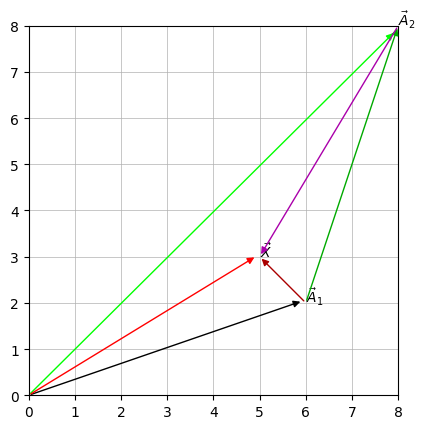

In [32]:
#@title Наглядное отображение операций с векторами

# Косинусное сходство (Косинус угла между векторами)
def cos_sim (v1, v2):
    cosine_similarity = torch.dot(v1, v2) / (torch.linalg.vector_norm(v1) * torch.linalg.vector_norm(v2))
    return cosine_similarity

# Проекция вектора на вектор
def pr_vec (v1, v2):
    pr_v1_on_v2 = torch.dot(v1, v2) / torch.linalg.vector_norm(v2)
    return pr_v1_on_v2
    
# Создаем вектора
vA0 = torch.Tensor([0,0])
vA1 = torch.Tensor([6,2])
vA2 = torch.Tensor([8,8])
vX  = torch.Tensor([5,3])

vA1X  = vX - vA1
vA2X  = vX - vA2
vA1A2 = vA2 - vA1 

# Вычисляем L2-норму (Евклидову метрику, Евклидово расстояние)
L2_A1   = torch.linalg.vector_norm(vA1)
L2_A2   = torch.linalg.vector_norm(vA2)
L2_X    = torch.linalg.vector_norm(vX)
L2_A1A2 = torch.linalg.vector_norm(vA1A2)
L2_A1X  = torch.linalg.vector_norm(vA1X)
L2_A2X  = torch.linalg.vector_norm(vA2X)

# Вывод
print ("vA1:", vA1, "\tL2:", L2_A1)
print ("vA2:", vA2, "\tL2:", L2_A2)
print ("vX:", vX, "\tL2:", L2_X)
print ("vA1A2:", vA1A2, "\tL2:", L2_A1A2)
print ("vA1X:", vA1X, "\tL2:", L2_A1X)
#print ("vA2X:", vA2X, "\tL2:", L2_A2X)

# Высчитываем угол между векторами
print ('Косинус угла между X и A1X:', cos_sim(vX,vA1X))
print ('Косинус угла между A1X и A2:', cos_sim(vA1X,vA2X))
print ('Косинус угла между A1 и A1X:', cos_sim(vA1,vA1X))
print ("---")

# Дорасчёт проекции в нужную сторону
cos_vA1X_vA1A2 = cos_sim(vA1X,vA1A2)
print ('Косинус угла между A1X и A1A2:', cos_vA1X_vA1A2)
cos_vA1X_vA1A0 = cos_sim(vA1X,-vA1)
print ('Косинус угла между A1X и A1A0(-A1):', cos_vA1X_vA1A0)
if cos_vA1X_vA1A2 > cos_vA1X_vA1A0:
    #vPr = vA1A2 # vA2 - vA1
    pr = pr_vec(vA1X, vA1A2)    
elif cos_vA1X_vA1A2 < cos_vA1X_vA1A0:
    #vPr = vA1
    pr = pr_vec(vA1X, vA1)    
else:
    pr = 0

# Высчитываем проекцию векторов на другие вектора
print ('Проекция A1X на A1A2:', pr_vec(vA1X, vA1A2))
print ('Проекция A1X на A1:', pr_vec(vA1X, vA1))
print ("---")
print ("Дорасчетная проекция: ", pr)
#print ('Проекция A2X на A1A2:', pr_vec(vA2X, vA1A2))
#print ('Проекция X на A1:', pr_vec(vX, vA1))
#print ("---")
#print ('Проекция A1 на A2:', pr_vec(vA1, vA2))
#print ('Проекция X на A2:', pr_vec(vX, vA2))

# Визуализация
arrowprops = {'arrowstyle': '<|-'}
plt.annotate(r'$\vec A_1$',xy=(0,0),xytext=vA1,arrowprops=arrowprops|{'color': '#000000'})
plt.annotate(r'$\vec A_2$',xy=(0,0),xytext=vA2,arrowprops=arrowprops|{'color': '#00ff00'})
plt.annotate('',xy=vA1,xytext=vA2,arrowprops=arrowprops|{'color': '#00aa00'})
plt.annotate(r'$\vec X$',xy=(0,0),xytext=vX,arrowprops=arrowprops|{'color': '#ff0000'})
plt.annotate('',xy=vA1,xytext=vX,arrowprops=arrowprops|{'color': '#aa0000'})
plt.annotate('',xy=vA2,xytext=vX,arrowprops=arrowprops|{'color': '#aa00aa'})

plt.axis('square')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.grid(linewidth=0.5)
plt.show()